In [144]:
from pysb import *

Defining the Model

In [145]:
Model()

<Model '_interactive_' (monomers: 0, rules: 0, parameters: 0, expressions: 0, compartments: 0) at 0x7fdf11e1dbb0>

Defining the Monomers

In [146]:
## Example Monomoer Monomer('Name', ['site1', 'site2'], {'site1': ['state1', 'state2']})
Monomer('Trail', ['b'])
Monomer('pR', ['b'])
Monomer('DISC', ['b'])
Monomer('Flip', ['b'])
Monomer('pC8', ['b'])
Monomer('C8', ['b'])
Monomer('BAR', ['b'])
Monomer('pC3', ['b'])
Monomer('C3', ['b'])
Monomer('pC6', ['b'])
Monomer('C6', ['b'])
Monomer('XIAP', ['b'])
Monomer('C3_U', ['b'])
Monomer('PARP', ['b'])
Monomer('cPARP', ['b'])
Monomer('Bid', ['b'])
Monomer('tBid', ['b'])
Monomer('Bcl2c', ['b'])
Monomer('Bax', ['b'])
Monomer('aBax', ['b'])
Monomer('mBax', ['b'])
Monomer('Bcl2', ['b'])
Monomer('Bax2', ['b'])
Monomer('Bax4', ['b'])
Monomer('Mito', ['b'])
Monomer('AMito', ['b'])
Monomer('mCytoC', ['b'])
Monomer('ACytoC', ['b'])
Monomer('mSmac', ['b'])
Monomer('ASmac', ['b'])
Monomer('cCytoC', ['b'])
Monomer('Apaf', ['b'])
Monomer('aApaf', ['b'])
Monomer('pC9', ['b'])
Monomer('Apop', ['b'])
Monomer('cSmac', ['b'])

Monomer('cSmac', ['b'])

Defining the Parameters

In [147]:
## Example Parameter Parameter('Name', numericalValue)
## Limited Reaction rates by type Kb, Kf, and Kc 
## Will use correct version for each reaction
## KBs
Parameter('kb1', 1e-3)
Parameter('kb2', 1e-2)
#KFs
Parameter('kf1', 4e-7)
Parameter('kf2', 1e-6)
Parameter('kf3', 1e-7)
Parameter('kf4', 3e-8)
Parameter('kf5', 2e-6)
Parameter('kf6', 1e-2)
Parameter('kf7', 1.4286e-5)
Parameter('kf8', 2.857e-5)
Parameter('kf9', 5e-7)
Parameter('kf10', 5e-8)
Parameter("kf11", 5e-9)
Parameter('kf12', 7e-6)
## KCs
Parameter('kc1', 1e-5)
Parameter('kc2', 1e0)
Parameter('kc3', 1e-1)
Parameter('kc4', 1e1)

Parameter('kc4', 10.0)

Defining the Observables

In [148]:
## Example Observable Observable('obsName', Species())
##Observing Capsase 3
Observable('capsase_3', C3(b=None))

Observable('capsase_3', C3(b=None))

Defining the Initial Condidtions

In [149]:
## Example Initial Condition Initial(Species(), Parameter('param', 50)) from the base set of directions
Initial(Trail(b=None), Parameter('Trail_0', 3e3))
Initial(pR(b=None), Parameter('pR_0', 2e2))
Initial(Flip(b=None), Parameter('Flip_0', 1e2))
Initial(pC8(b=None), Parameter('pc8_0', 2e4))
Initial(BAR(b=None), Parameter('BAR_0', 1e3))
Initial(pC3(b=None), Parameter('pC3_0', 1e4))
Initial(pC6(b=None), Parameter('pC6_0', 1e4))
Initial(XIAP(b=None), Parameter('XIAP_0', 1e5))
Initial(PARP(b=None), Parameter('PARP_0', 1e6))
Initial(Bid(b=None), Parameter('Bid_0', 4e4))
Initial(Bax(b=None), Parameter('Bax_0'), 1e5)
Initial(Bcl2c(b=None), Parameter('Bcl2c_0', 2e4))
Initial(Mito(b=None), Parameter('Mito_0', 5e5))
Initial(mCytoC(b=None), Parameter('cCytoC_0', 5e5))
Initial(mSmac(b=None), Parameter('mSmac_0', 1e5))
Initial(pC9(b=None), Parameter('pC9_0', 1e5))
Initial(Apaf(b=None), Parameter('Apaf_0', 1e5))

Initial(Apaf(b=None), Apaf_0)

Reaction Functions

In [150]:
## Reaction Functions
## Catalyze
def catalyze(Reactant1, Reactant2, Prod, kb, kf, kc):
    """2-step catalytic process
    Rule looks like A + B <--> A % B -> A + D"""
    r1_name = "bind_%s_%s" % (Reactant2.name, Reactant1.name)
    r2_name = "produce_%s_%s_from_%s_and_%s" % (Prod.name, Reactant1.name, Reactant1.name, Reactant2.name)
    E = Reactant1(b=None)
    S = Reactant2(b=None)
    ES = Reactant1(b=1) % Reactant2(b=1)
    P = Prod(b=None)
    Rule(r1_name, E + S | ES, kb, kf)
    Rule(r2_name, ES >> E + P, kc)
def inhibit_reversable(Reactant1, Reactant2, kb, kf):
    """1-step reversable process Rule looks like A--|B"""
    r_name = "inbiit_%s_%s" % (Reactant2.name, Reactant1.name)
    E = Reactant1(b=None)
    S = Reactant2(b=None)
    Rule(r_name, E(b=None) + S(b=None) | E(b=1)% S(b=1), kf, kb)
def catalyze_two(Reactant1, Reactant2, Prod, kb, kf, kc):
    """2-step catalytic process
    Rule looks like A + B <--> A %B -> C"""
    r1_name = "binds_%s_%s" % (Reactant2.name, Reactant1.name)
    r2_name = "produces_%s" % (Prod.name)
    E = Reactant1(b=None)
    S = Reactant2(b=None)
    ES = Reactant1(b=1) % Reactant2(b=1)
    P = Prod(b=None)
    Rule(r1_name, E + S| ES, kb, kf)
    Rule(r2_name, ES >> P, kc)
def reversable(Reactant1, Reactant2, kb,  kf):
    """1-step reversable process Rule looks like A <--> B"""
    r_name = "%s_reversesto_%s" % (Reactant1.name, Reactant2.name)
    E = Reactant1(b=None)
    S = Reactant2(b=None)
    Rule(r_name, E | S, kb, kf)
def rev_plus(Reactant1, Prod, kb, kf):
    """1-step add reversable Rule looks like A + A <--> B"""
    r_name = "%s_added_to_%s" % (Reactant1.name, Reactant1.name)
    E = Reactant1(b=None)
    P = Prod(b=None)
    Rule(r_name, E + E | P, kb, kf)
def rev_plus_two(Reactant1, Reactant2, Prod, kb, kf):
    """1-step add reversable Rule looks like A + B <--> C"""
    r_name = "%s_binds_to_%s" % (Reactant1.name, Reactant2.name)
    E = Reactant1(b=None)
    S = Reactant2(b=None)
    P = Prod(b=None)
    Rule(r_name, E + S | P, kb, kf)

Reactions

In [151]:
## Reactions
catalyze_two(Trail, pR, DISC, kb1, kf1, kc1)
inhibit_reversable(Flip, DISC, kb1, kf2)
catalyze(pC8, DISC, C8, kb1, kf2, kc2)
inhibit_reversable(C8, BAR, kb1, kf2)
catalyze(pC3, C8, C3, kb1, kf3, kc2)
catalyze(pC6, C3, C6, kb1, kf2, kc2)
catalyze(pC8, C6, C8, kb1, kf4, kc2)
catalyze(XIAP, C3, C3_U, kb1, kf5, kc3)
catalyze(PARP, C3, cPARP, kb2, kf2, kc2)
catalyze(Bid, C8, tBid, kb1, kf3, kc2)
inhibit_reversable(Bcl2c, tBid, kb1, kf2)
catalyze(Bax, tBid, aBax, kb1, kf3, kc2)
reversable(aBax, mBax, kb2, kf2)
inhibit_reversable(Bcl2, mBax, kb1, kf7)
rev_plus(mBax, Bax2, kb1, kf8)
inhibit_reversable(Bcl2, Bax4, kb1, kf7)
catalyze_two(Bax4, Mito, AMito, kb1, kf7, kc2)
catalyze(AMito, mCytoC, ACytoC, kb1, kf8, kc4)
catalyze(AMito, mSmac, ASmac, kb1, kf8, kc4)
reversable(ACytoC, cCytoC, kb2, kf6)
catalyze(Apaf, cCytoC, aApaf, kb1, kf9, kc2)
rev_plus_two(aApaf, pC9, Apop, kb1, kf10)
catalyze(Apop, pC3, C3, kb1, kf11, kc2)
reversable(ASmac, cSmac, kb2, kf6)
inhibit_reversable(XIAP, Apop, kb1, kf5)
inhibit_reversable(XIAP, cSmac, kb1, kf12)

binds_pR_Trail
produces_DISC
inbiit_DISC_Flip
bind_DISC_pC8
produce_C8_pC8_from_pC8_and_DISC
inbiit_BAR_C8
bind_C8_pC3
produce_C3_pC3_from_pC3_and_C8
bind_C3_pC6
produce_C6_pC6_from_pC6_and_C3
bind_C6_pC8
produce_C8_pC8_from_pC8_and_C6
bind_C3_XIAP
produce_C3_U_XIAP_from_XIAP_and_C3
bind_C3_PARP
produce_cPARP_PARP_from_PARP_and_C3
bind_C8_Bid
produce_tBid_Bid_from_Bid_and_C8
inbiit_tBid_Bcl2c
bind_tBid_Bax
produce_aBax_Bax_from_Bax_and_tBid
aBax_reversesto_mBax
inbiit_mBax_Bcl2
mBax_added_to_mBax
inbiit_Bax4_Bcl2
binds_Mito_Bax4
produces_AMito
bind_mCytoC_AMito
produce_ACytoC_AMito_from_AMito_and_mCytoC
bind_mSmac_AMito
produce_ASmac_AMito_from_AMito_and_mSmac
ACytoC_reversesto_cCytoC
bind_cCytoC_Apaf
produce_aApaf_Apaf_from_Apaf_and_cCytoC
aApaf_binds_to_pC9
bind_pC3_Apop
produce_C3_Apop_from_Apop_and_pC3
ASmac_reversesto_cSmac
inbiit_Apop_XIAP
inbiit_cSmac_XIAP


Simulating the Model

In [152]:
##Scipy Ode Simulator
from pysb.simulator import ScipyOdeSimulator
from pylab import *

In [153]:
time = linspace(0,20*60*60,20*60)
sim = ScipyOdeSimulator(model, tspan=time).run()
simResults = sim.all

Plot the Simulation Results

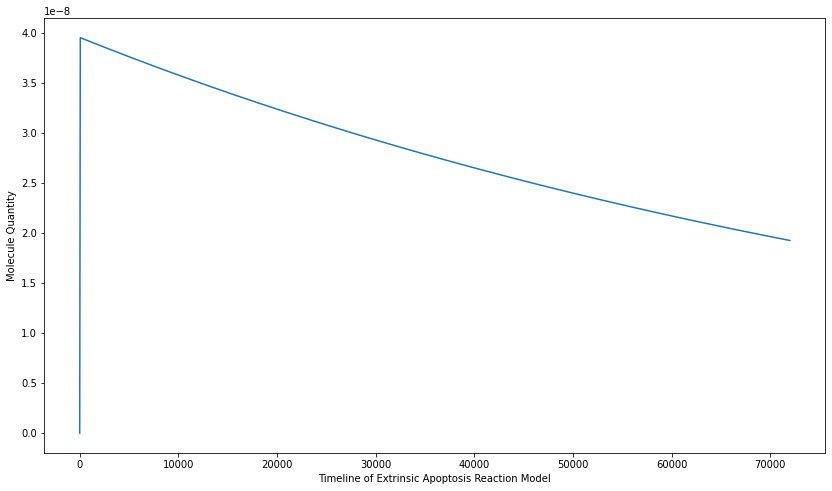

In [154]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

##Plotting Capsase 3 Quantity

plt.plot(time, simResults['capsase_3'])

plt.xlabel("Timeline of Extrinsic Apoptosis Reaction Model")
plt.ylabel("Molecule Quantity")
plt.show()